In [4]:
# 首先是在二维模型上找出线性最大间距分割法
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [71]:
path = 'D:/Google_Download/andrew_ml_ex67101/ex6data1.mat'
raw_data = loadmat(path)
data = pd.DataFrame(raw_data['X'],columns=['X1','X2'])
data['y'] = raw_data['y']
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [14]:
# 进行可视化数据
def plot_init_data(fig,ax,data):
    data1 = data[data['y']==0]          # 取出负样本
    data2 = data[data['y']==1]          # 取出正样本
    ax.scatter(data1['X1'],data1['X2'],color='red',marker='x',label='Negative')
    ax.scatter(data2['X1'],data2['X2'],color='green',marker='o',label='Positive')
    pass


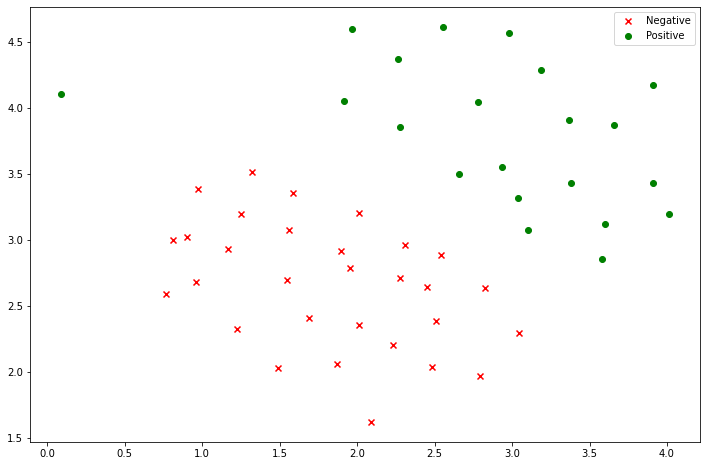

In [16]:
fig,ax = plt.subplots(figsize=(12,8))
plot_init_data(fig,ax,data)
ax.legend(loc='best')
plt.show()

In [19]:
# 使用sklearn中的svm包
from sklearn import svm
svc = svm.LinearSVC(C=1,loss='hinge',max_iter=1000)
svc

LinearSVC(C=1, loss='hinge')

In [20]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

D:\Software\Conda\envs\myPy3.6\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [25]:
# 可视化边界
def find_decision_boundary(svc,x1min,x1max,x2min,x2max,diff):
    x1 = np.linspace(x1min,x1max,1000)
    x2 = np.linspace(x2min,x2max,1000)
    cordinates = [(x,y) for x in x1 for y in x2]
    x_cord,y_cord = zip(*cordinates)
    c_val = pd.DataFrame({'X1':x_cord,'X2':y_cord})
    c_val['cval'] = svc.decision_function(c_val[['X1','X2']])
    
    decision = c_val[np.abs(c_val['cval'])<diff]
    return decision.X1,decision.X2

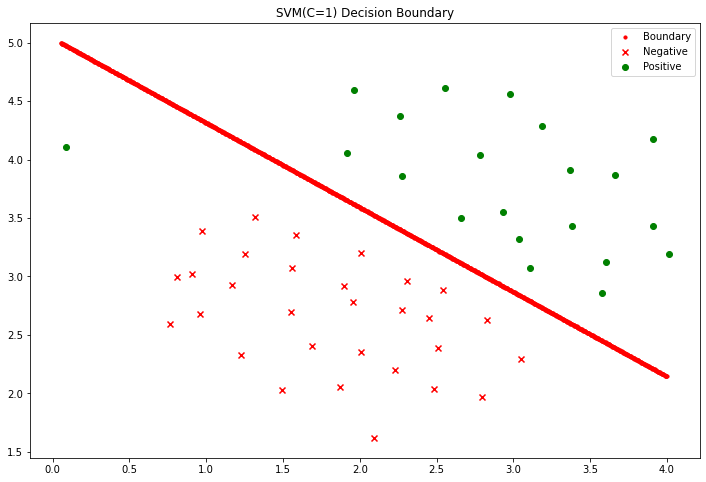

In [27]:
x1,x2 = find_decision_boundary(svc,0,4,1.5,5,2*10**-3)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,color='r',label='Boundary')
plot_init_data(fig,ax,data)
ax.legend(loc='best')
ax.set_title('SVM(C=1) Decision Boundary')
plt.show()

In [28]:
# 看看增大C值
svc2 = svm.LinearSVC(C=100,loss='hinge',max_iter=1000)
svc2.fit(data[['X1','X2']],data['y'])
svc2.score(data[['X1','X2']],data['y'])

D:\Software\Conda\envs\myPy3.6\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9411764705882353

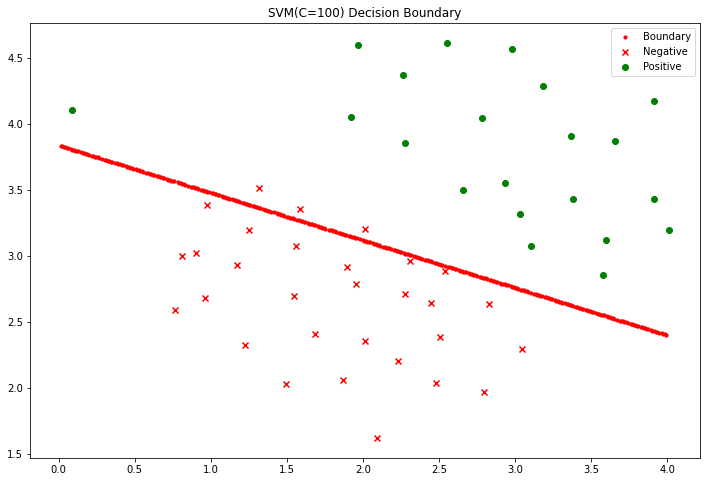

In [30]:
# 增大C相当于增大拟合的惩罚项，会产生过拟合
x1,x2 = find_decision_boundary(svc2,0,4,1.5,5,2*10**-3)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,color='r',label='Boundary')
plot_init_data(fig,ax,data)
ax.legend(loc='best')
ax.set_title('SVM(C=100) Decision Boundary')
plt.show()

In [52]:
# 定义一个高斯内核函数，虽然sklearn包中包含了该函数，这里还是自己实现一下
def gaussian_kernel(x1,x2,sigma=2):
    return np.exp(-np.sum((x1-x2)**2)/(2*(sigma**2)))

In [53]:
# 测试下这个函数
x1 = np.array([1.0,2.0,1.0])
x2 = np.array([0.0,4.0,-1.0])
sigma = 2
gaussian_kernel(x1,x2,sigma)

0.32465246735834974

In [54]:
# 接下来在另一个数据集上使用高斯内核的非线性SVM
path = 'D:/Google_Download/andrew_ml_ex67101/ex6data2.mat'
raw_data = loadmat(path)
data = pd.DataFrame(raw_data['X'],columns=['X1','X2'])
data['y'] = raw_data['y']
data.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


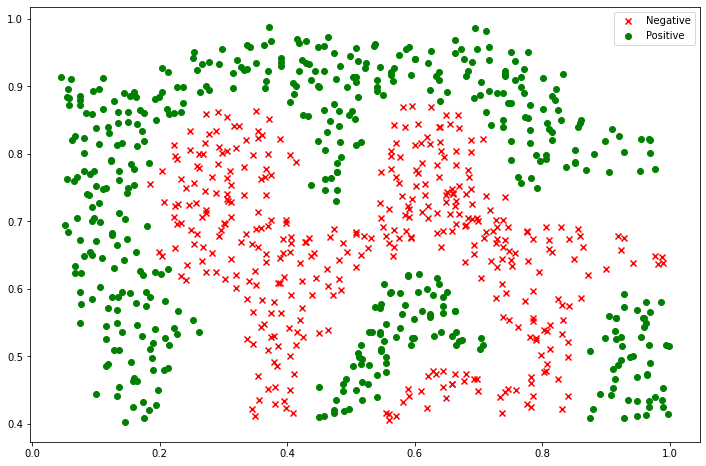

In [55]:
# 可视化图像
fig,ax = plt.subplots(figsize=(12,8))
plot_init_data(fig,ax,data)
ax.legend(loc='best')
plt.show()

In [58]:
# 使用高斯核函数的SVM分割
# 通过kernel可以控制选取什么样的高斯函数，默认是linear线性的
svc = svm.SVC(kernel='rbf',gamma=10,C=100,probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [59]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9698725376593279

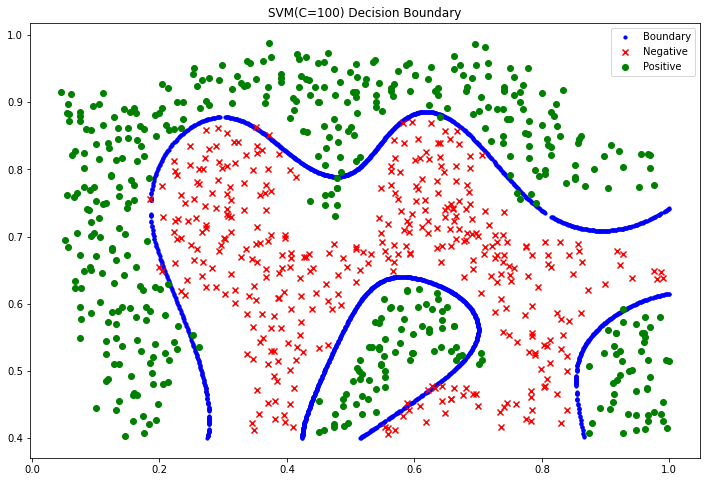

In [62]:
x1,x2 = find_decision_boundary(svc,0,1,0.4,1,0.01)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,color='blue',label='Boundary')
plot_init_data(fig,ax,data)
ax.legend(loc='best')
ax.set_title('SVM(C=100) Decision Boundary')
plt.show()

In [74]:
path = 'D:/Google_Download/andrew_ml_ex67101/ex6data3.mat'
raw_data = loadmat(path)
X,y,Xval,yval = raw_data['X'],raw_data['y'],raw_data['Xval'],raw_data['yval']
data = pd.DataFrame(raw_data['X'],columns=['X1','X2'])
data['y'] = raw_data['y']
data.head()

,X1,X2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


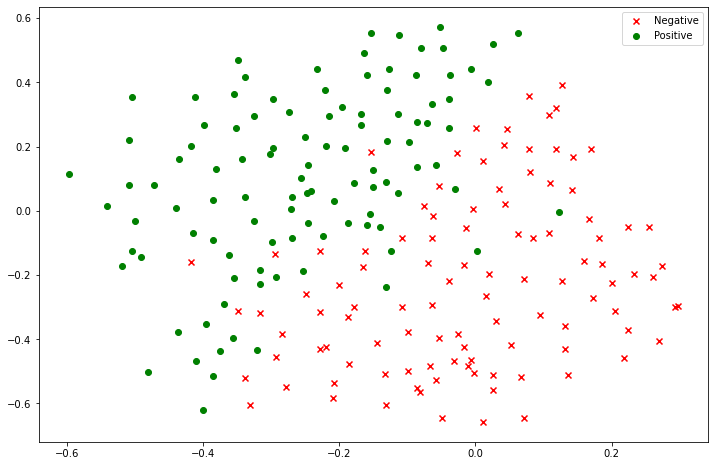

In [65]:
# 进行可视化数据
fig,ax = plt.subplots(figsize=(12,8))
plot_init_data(fig,ax,data)
ax.legend()
plt.show()

In [76]:
# 然后使用高斯内核的SVM进行分类
C_vlaues = [0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000]
gamma_values = [0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000]
best_score = 0
best_params = {'C':None,'gamma':None}
for C in C_vlaues:
    for gamma in gamma_values:
        svc = svm.SVC(kernel='rbf',C=C,gamma=gamma,probability=True)
        svc.fit(data[['X1','X2']],data['y'])
        score = svc.score(data[['X1','X2']],data['y'])
        if(score>best_score):
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
            pass
        pass
    pass
best_score,best_params

(1.0, {'C': 1, 'gamma': 1000})

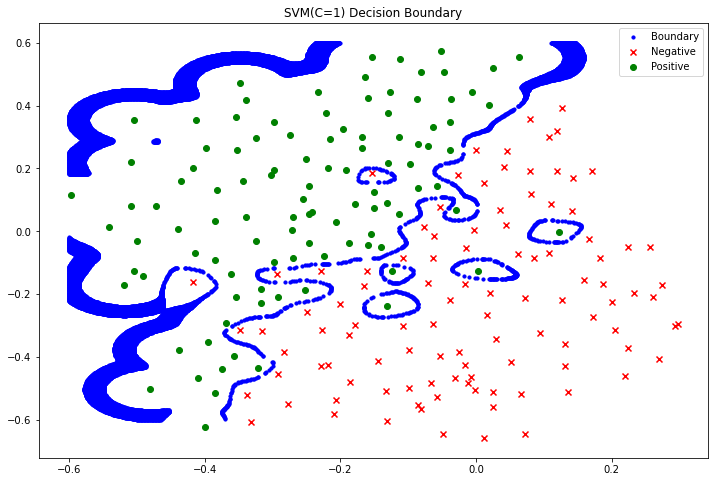

In [83]:
svc = svm.SVC(kernel='rbf',C=best_params['C'],gamma=1000,probability=True)
svc.fit(data[['X1','X2']],data['y'])

x1,x2 = find_decision_boundary(svc,-0.6,0.3,-0.6,0.6,0.005)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,color='blue',label='Boundary')
plot_init_data(fig,ax,data)
ax.legend(loc='best')
ax.set_title('SVM(C={}) Decision Boundary'.format(best_params['C']))
plt.show()

In [84]:
# 对垃圾邮件进行分类
# 1.提取特征，训练垃圾邮件的svm
# 这里特征已经是预处理之后的，训练集有4000封邮件，按其中出现的单词作为特征，共1899个单词特征
pathTrain = 'D:/Google_Download/andrew_ml_ex67101/spamTrain.mat'
pathTest = 'D:/Google_Download/andrew_ml_ex67101/spamTest.mat'
raw_Train = loadmat(pathTrain)
raw_Test = loadmat(pathTest)
raw_Train,raw_Test

({'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
  '__version__': '1.0',
  '__globals__': [],
  'X': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'y': array([[1],
         [1],
         [0],
         ...,
         [1],
         [0],
         [0]], dtype=uint8)},
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:39 2011',
  '__version__': '1.0',
  '__globals__': [],
  'Xtest': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'ytest': array([[1],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [

In [95]:
X = raw_Train['X']
y = raw_Train['y'].ravel()
Xtest = raw_Test['Xtest']
ytest = raw_Test['ytest'].ravel()
X.shape,y.shape,Xtest.shape,ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [97]:
svc = svm.SVC(kernel='rbf')
svc.fit(X,y)

SVC()

In [99]:
# 训练完成后看看准确度
print('Training accuracy:{:.2}%'.format(svc.score(X,y)))
print('Testing accuracy:{:.2}%'.format(svc.score(Xtest,ytest)))

Training accuracy:0.99%
Testing accuracy:0.99%


In [101]:
# 进行可视化
# 创建一个对角矩阵
kw = np.eye(X.shape[1])
kw[:3,:]
spam_val = pd.DataFrame({'idx':range(1899)})

In [102]:
spam_val['isspam'] = svc.decision_function(kw)

In [103]:
spam_val.describe()          # 实际上我只需要看isspam 列即可

,idx,isspam
count,1899.000000,1899.000000
mean,949.000000,-0.110039
std,548.338399,0.049094
min,0.000000,-0.428396
25%,474.500000,-0.131213
50%,949.000000,-0.111985
75%,1423.500000,-0.091973
max,1898.000000,0.396286


In [105]:
decision = spam_val[spam_val['isspam']>0]
decision

,idx,isspam
155,155,0.095529
173,173,0.066666
297,297,0.396286
351,351,0.023785
382,382,0.030317
476,476,0.042474
478,478,0.057344
529,529,0.060692
537,537,0.008558
680,680,0.109643


In [106]:
# 找出对应的单词
path = 'D:/Google_Download/andrew_ml_ex67101/vocab.txt'
voc = pd.read_csv(path,header=None,names=['idx','voc'],sep='\t')
voc.head()

,idx,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [112]:
spamvoc = voc.loc[list(decision['idx'])]
spamvoc

,idx,voc
155,156,basenumb
173,174,below
297,298,click
351,352,contact
382,383,credit
476,477,dollar
478,479,dollarnumb
529,530,email
537,538,encod
680,681,free
